In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('C:/Users/udipt/Desktop/Websoft/Assignment/DataScienceCaseStudy/dataSample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16162 entries, 0 to 16161
Data columns (total 11 columns):
Unnamed: 0               16162 non-null int64
ID                       16162 non-null int64
Type                     16162 non-null object
event_timestamp          16162 non-null int64
event_label              16162 non-null object
log_timestamp            16162 non-null int64
log_reading_1            15848 non-null float64
log_reading_2            15883 non-null object
log_reading_3            15843 non-null float64
log_reading_4            16162 non-null int64
warranty_service_flag    1389 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 1.4+ MB


# Making all variables numeric

In [3]:
df=pd.get_dummies(df)

In [4]:
df.columns

Index(['Unnamed: 0', 'ID', 'event_timestamp', 'log_timestamp', 'log_reading_1',
       'log_reading_3', 'log_reading_4', 'Type_TypeA', 'Type_TypeB',
       'event_label_activate', 'event_label_break', 'log_reading_2_a',
       'log_reading_2_b', 'log_reading_2_c', 'warranty_service_flag_n',
       'warranty_service_flag_y'],
      dtype='object')

In [5]:
df=df.drop(columns=['warranty_service_flag_n','event_label_break','Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16162 entries, 0 to 16161
Data columns (total 13 columns):
ID                         16162 non-null int64
event_timestamp            16162 non-null int64
log_timestamp              16162 non-null int64
log_reading_1              15848 non-null float64
log_reading_3              15843 non-null float64
log_reading_4              16162 non-null int64
Type_TypeA                 16162 non-null uint8
Type_TypeB                 16162 non-null uint8
event_label_activate       16162 non-null uint8
log_reading_2_a            16162 non-null uint8
log_reading_2_b            16162 non-null uint8
log_reading_2_c            16162 non-null uint8
warranty_service_flag_y    16162 non-null uint8
dtypes: float64(2), int64(4), uint8(7)
memory usage: 868.2 KB


# Imputing missing values

In [6]:
df['log_reading_1'].fillna(df['log_reading_1'].median(),inplace=True)
df['log_reading_3'].fillna(df['log_reading_3'].median(),inplace=True)

# Train_test split

In [7]:
x=df.drop('event_label_activate',axis=1)
y=df['event_label_activate']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.33,stratify=y,random_state=10)
print(x_tr.shape,x_te.shape,y_tr.shape,y_te.shape)
print(y_tr.mean(),y_te.mean(),sep='*****')

(10828, 12) (5334, 12) (10828,) (5334,)
0.6584780199482823*****0.6586051743532059


# Decision tree model

In [10]:
from sklearn import tree

In [11]:
dt=tree.DecisionTreeClassifier(random_state=10)
dt.fit(x_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,precision_score,recall_score

In [13]:
pg={'max_depth':[3,4,5,6,7,8,9], 'max_features':['sqrt','log2'], 'min_samples_split':[2,3,4]}

In [14]:
dt_gr=GridSearchCV(dt,pg,cv=5,n_jobs=-1,scoring='roc_auc')
dt_gr.fit(x_tr,y_tr)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=10,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9],
                         'max_features': ['sqrt', 'log2'],
                    

In [15]:
dt_gr.best_params_

{'max_depth': 7, 'max_features': 'sqrt', 'min_samples_split': 3}

In [16]:
dt_gb=dt_gr.best_estimator_

# Performance

### On training data

In [17]:
print(f'Accuracy score ={accuracy_score(y_tr,dt_gb.predict(x_tr))}, roc auc score ={roc_auc_score(y_tr,dt_gb.predict(x_tr))}')

Accuracy score =0.7494458810491319, roc auc score =0.773822285197184


In [18]:
print(f'f1 score ={f1_score(y_tr,dt_gb.predict(x_tr))}, precision ={precision_score(y_tr,dt_gb.predict(x_tr))}, recall ={recall_score(y_tr,dt_gb.predict(x_tr))}')

f1 score =0.7855505493636866, precision =0.9000181126607498, recall =0.696914446002805


### On test data

In [19]:
print(f'Accuracy score ={accuracy_score(y_te,dt_gb.predict(x_te))}, roc auc score ={roc_auc_score(y_te,dt_gb.predict(x_te))}')

Accuracy score =0.7420322459692539, roc auc score =0.7643499714639577


In [20]:
print(f'f1 score ={f1_score(y_te,dt_gb.predict(x_te))}, precision ={precision_score(y_te,dt_gb.predict(x_te))}, recall ={recall_score(y_te,dt_gb.predict(x_te))}')

f1 score =0.7799104286628279, precision =0.8901058780576853, recall =0.6939937375462567


# Plot

In [26]:
dot_data=tree.export_graphviz(dt_gb,feature_names=x_tr.columns,filled=True)

In [27]:
from IPython.display import Image
import pydotplus

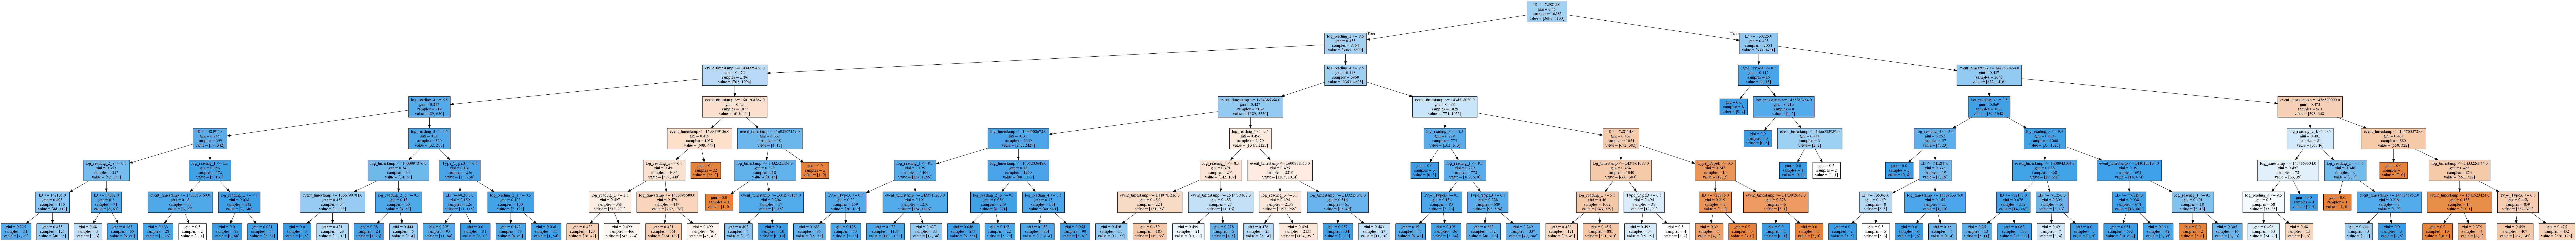

In [33]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png(),unconfined=True)

In [22]:
y_pr=dt_gb.predict_proba(x_te)
y_pr.mean()

0.5

In [23]:
y_pr=dt_gb.predict(x_te)
y_pr.mean()

0.5134983127109112